In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [5]:
#Load Data
data = pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\Promotion_prediction_data\train.csv")
test=pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\Promotion_prediction_data\test.csv")
submission_data=pd.read_csv(r"C:\Users\infan\OneDrive\Desktop\Gayathri\dataset\Promotion_prediction_data\sample_submission.csv")

# Initial Exploration

In [8]:
#sample of data

data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
#whole information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
#to view column names
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
#to find no.of rows and columns
data.shape

(54808, 14)

In [8]:
#to find the datatypes of each column
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [9]:
# check duplicates in data
data.duplicated().sum()

0

In [10]:
#to find the null values
data.isna().sum()

# columns contains null values : education,previous_year_rating    

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# EDA

In [12]:
#checking data is balanced or not
data['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [13]:
data['is_promoted'].value_counts(normalize=True)*100

is_promoted
0    91.482995
1     8.517005
Name: proportion, dtype: float64

In [14]:
#to view no.of unique values and those values in each columns
print("No of unique value")
print("--------------")
for col in data.columns:
    print(col ,":" ,data[col].nunique())

print("==========================================================")

print("Unique values of the columns which is containing minimum distinct unique value")  
print("--------------")
for col in data.columns:
    if data[col].nunique()<10:
        print(col ,":" ,data[col].unique())

No of unique value
--------------
employee_id : 54808
department : 9
region : 34
education : 3
gender : 2
recruitment_channel : 3
no_of_trainings : 10
age : 41
previous_year_rating : 5
length_of_service : 35
KPIs_met >80% : 2
awards_won? : 2
avg_training_score : 61
is_promoted : 2
Unique values of the columns which is containing minimum distinct unique value
--------------
department : ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
education : ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender : ['f' 'm']
recruitment_channel : ['sourcing' 'other' 'referred']
previous_year_rating : [ 5.  3.  1.  4. nan  2.]
KPIs_met >80% : [1 0]
awards_won? : [0 1]
is_promoted : [0 1]


In [15]:
#seperate numeric columns and categorical columns and ignore and target columns

ignore_col=['employee_id']
target_col=['is_promoted']
num_col=[]
cat_col=[]
for col in data.columns:
    if col not in ignore_col + target_col:
        if data[col].dtypes == 'object':
            cat_col.append(col)
        else:
            num_col.append(col)

In [16]:
print(ignore_col)
print(target_col)
print(num_col)
print(cat_col)

['employee_id']
['is_promoted']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
['department', 'region', 'education', 'gender', 'recruitment_channel']


In [177]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [18]:
#to find correlation between numerical columns
data[num_col].corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
no_of_trainings,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517
age,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380
previous_year_rating,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139
length_of_service,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122
KPIs_met >80%,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391
awards_won?,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138
avg_training_score,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000


In [19]:
#to find correlation between numerical columns and target column
data[num_col+target_col].corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


<Axes: >

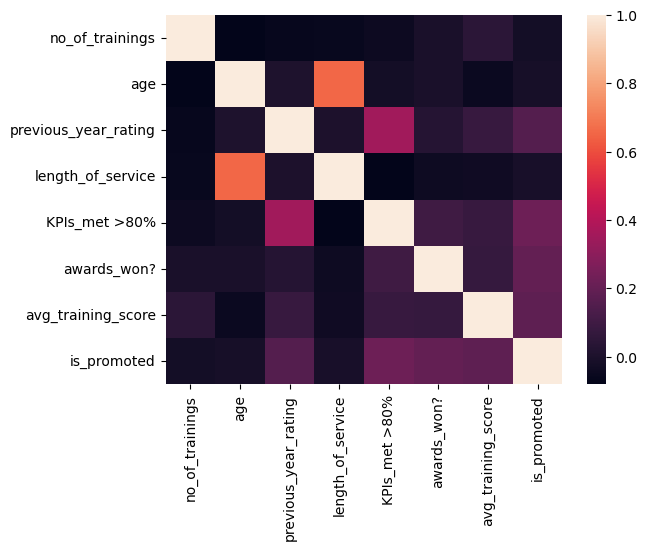

In [20]:
sns.heatmap(data[num_col+target_col].corr())

<Axes: xlabel='previous_year_rating', ylabel='KPIs_met >80%'>

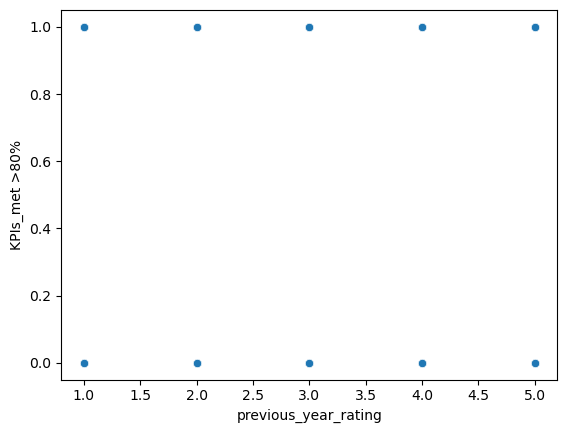

In [21]:
#previous_year_rating having null values , here im trying to find the way to impute that.

sns.scatterplot(data,x=data['previous_year_rating'],y=data['KPIs_met >80%'])

In [22]:
data[['previous_year_rating','KPIs_met >80%']].groupby('KPIs_met >80%').value_counts()

KPIs_met >80%  previous_year_rating
0              3.0                     13810
               4.0                      5899
               1.0                      5424
               5.0                      4246
               2.0                      3456
1              5.0                      7495
               3.0                      4808
               4.0                      3978
               1.0                       799
               2.0                       769
Name: count, dtype: int64

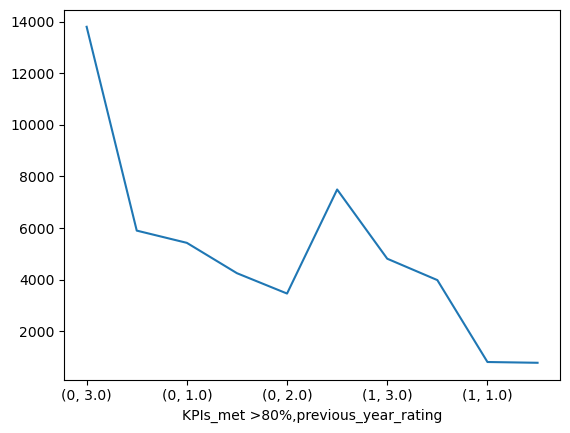

<Figure size 1000x500 with 0 Axes>

In [23]:
data[['previous_year_rating','KPIs_met >80%']].groupby('KPIs_met >80%').value_counts().plot()
plt.figure(figsize=(10,5))
plt.show()

In [45]:
data['length_of_service'].value_counts()

length_of_service
3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: count, dtype: int64

In [47]:
data.loc[data['length_of_service'] ==1 ,'previous_year_rating'].value_counts()

previous_year_rating
3.0    158
4.0    114
5.0     64
1.0     44
2.0     43
Name: count, dtype: int64

<Axes: xlabel='previous_year_rating', ylabel='length_of_service'>

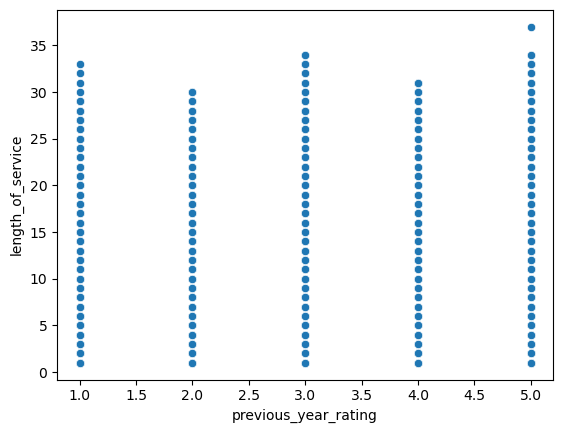

In [49]:
sns.scatterplot(data,x=data['previous_year_rating'],y=data['length_of_service'])

In [50]:
data[['KPIs_met >80%','awards_won?','age','previous_year_rating']].groupby('previous_year_rating').value_counts()


previous_year_rating  KPIs_met >80%  awards_won?  age
1.0                   0              0            32     356
                                                  30     352
                                                  31     352
                                                  33     341
                                                  34     340
                                                        ... 
5.0                   1              1            23       1
                                                  24       1
                                                  48       1
                                                  49       1
                                                  52       1
Name: count, Length: 669, dtype: int64

<Axes: xlabel='previous_year_rating,age,KPIs_met >80%'>

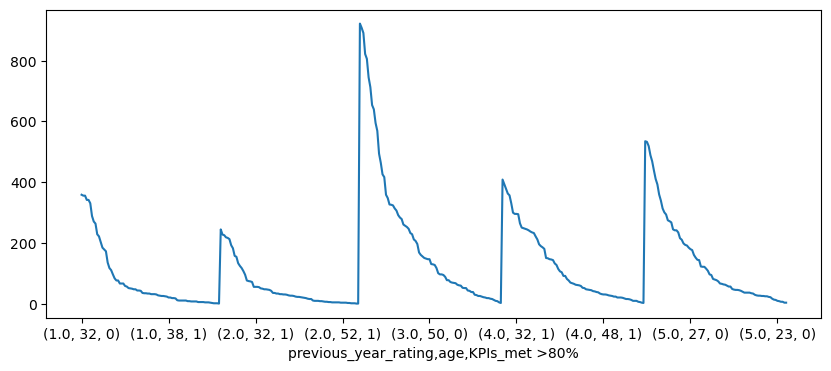

In [53]:
plt.figure(figsize=(10,4))
data[['age','previous_year_rating','KPIs_met >80%']].groupby('previous_year_rating').value_counts().plot()

<Axes: xlabel='previous_year_rating,avg_training_score'>

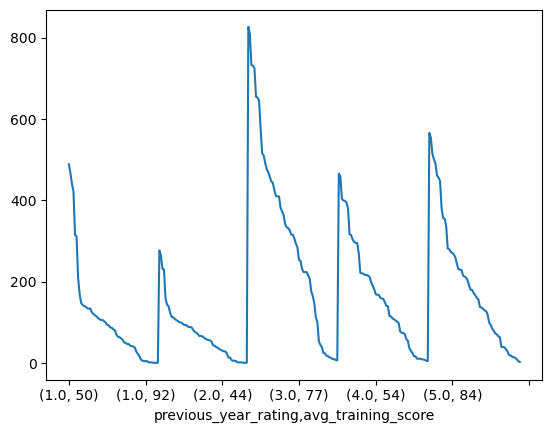

In [55]:
data[['avg_training_score','previous_year_rating']].groupby('previous_year_rating').value_counts().plot()

<Axes: xlabel='avg_training_score', ylabel='previous_year_rating'>

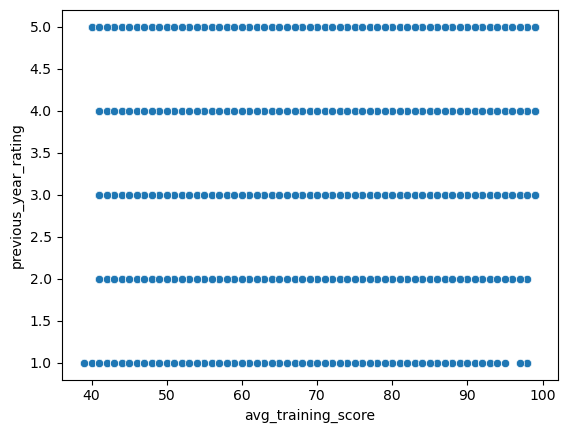

In [57]:
sns.scatterplot(data=data, y='previous_year_rating', x='avg_training_score')


<Axes: xlabel='age', ylabel='previous_year_rating'>

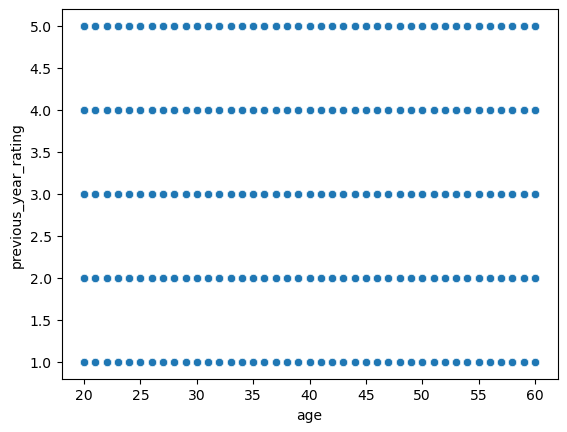

In [59]:
sns.scatterplot(data=data, y='previous_year_rating', x='age')

<Axes: xlabel='KPIs_met >80%', ylabel='previous_year_rating'>

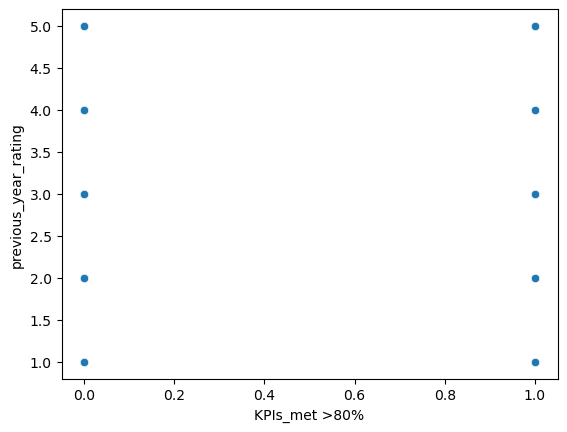

In [60]:
sns.scatterplot(data=data, y='previous_year_rating', x='KPIs_met >80%')

<Axes: xlabel='awards_won?', ylabel='previous_year_rating'>

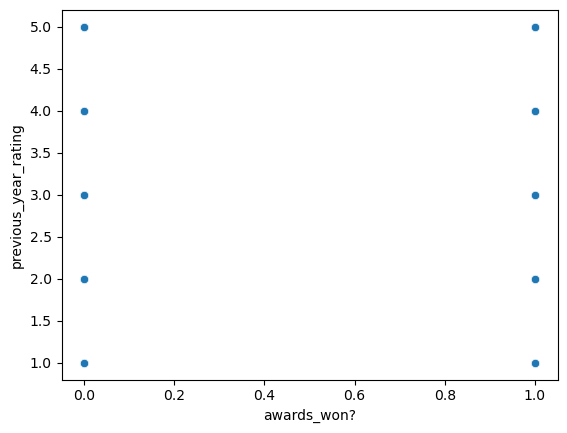

In [61]:
sns.scatterplot(data=data, y='previous_year_rating', x='awards_won?')

<Axes: xlabel='length_of_service', ylabel='previous_year_rating'>

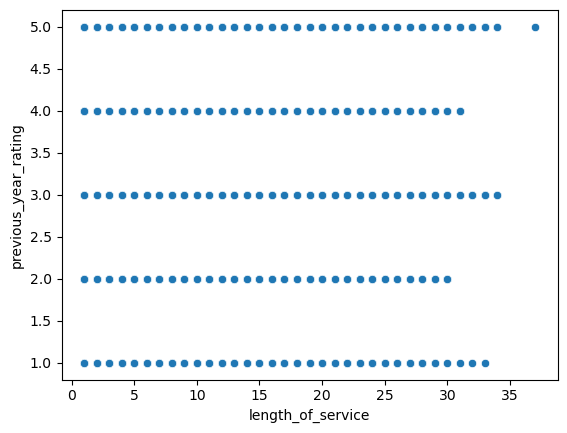

In [62]:
sns.scatterplot(data=data, y='previous_year_rating', x='length_of_service')

In [91]:
data[(data['previous_year_rating'].isna()) & (data['length_of_service'] == 1) ]


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


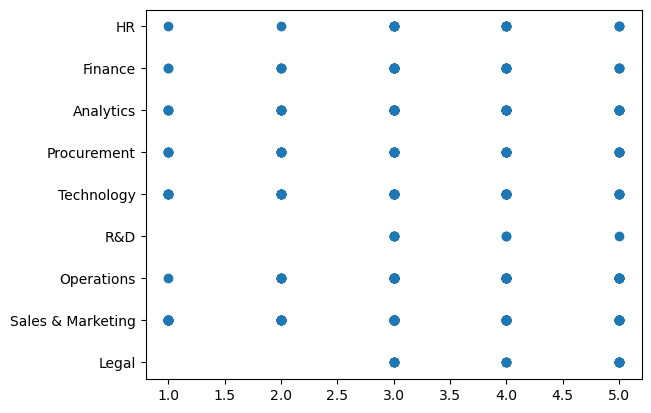

In [117]:
data[(data['previous_year_rating'].notnull()) & (data['length_of_service'] == 1)]

# Filter the data
x = data[(data['previous_year_rating'].notnull()) & (data['length_of_service'] == 1)]
y = x['department']

# Scatter plot
plt.scatter(x['previous_year_rating'], y)

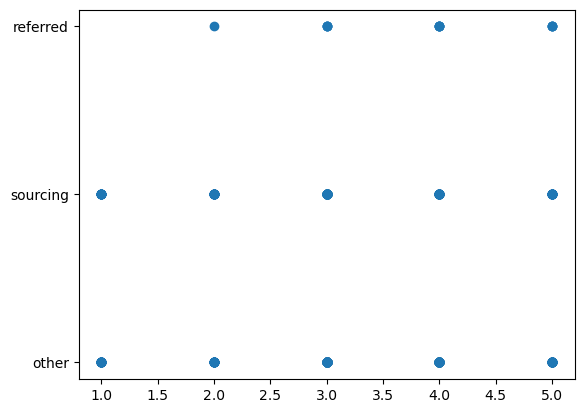

In [129]:
data[(data['previous_year_rating'].notnull()) & (data['length_of_service'] == 1)]

# Filter the data
x = data[(data['previous_year_rating'].notnull()) & (data['length_of_service'] == 1)]
y = x['recruitment_channel']

# Scatter plot
plt.scatter(x['previous_year_rating'], y)

<Axes: xlabel='department'>

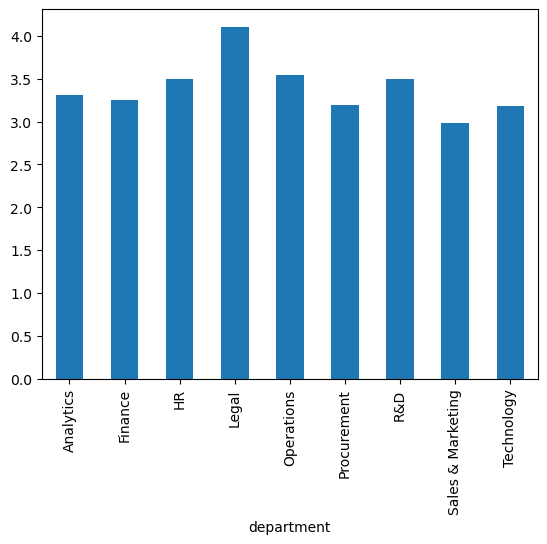

In [157]:
x = data[(data['previous_year_rating'].notnull()) & (data['length_of_service'] == 1)]
# x.groupby('department')['previous_year_rating'].value_counts()
x.groupby('department')['previous_year_rating'].mean().plot.bar()

<Axes: xlabel='department'>

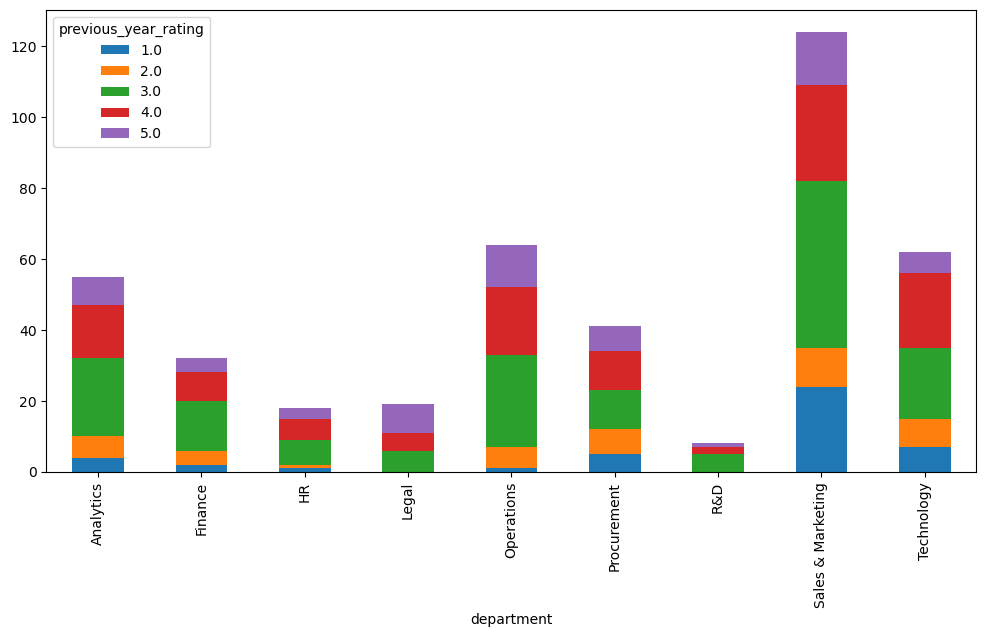

In [159]:
rating_counts = x.groupby(['department', 'previous_year_rating']).size().unstack(fill_value=0)
rating_counts.plot(kind='bar', stacked=True, figsize=(12, 6))


In [72]:
data[['previous_year_rating','avg_training_score']].groupby('avg_training_score').value_counts()

avg_training_score  previous_year_rating
39                  1.0                      2
40                  5.0                      3
                    1.0                      1
41                  3.0                      7
                    1.0                      5
                                            ..
98                  1.0                      2
                    2.0                      1
99                  5.0                     15
                    3.0                     13
                    4.0                      6
Name: count, Length: 295, dtype: int64

In [75]:
data[['previous_year_rating','avg_training_score','KPIs_met >80%']].groupby('previous_year_rating').value_counts()

previous_year_rating  avg_training_score  KPIs_met >80%
1.0                   50                  0                428
                      49                  0                414
                      48                  0                398
                      51                  0                377
                      47                  0                285
                                                          ... 
5.0                   41                  1                  3
                      42                  1                  3
                      40                  1                  2
                      41                  0                  2
                      40                  0                  1
Name: count, Length: 576, dtype: int64

In [77]:
data[['previous_year_rating','awards_won?']].groupby('awards_won?').value_counts()

awards_won?  previous_year_rating
0            3.0                     18211
             5.0                     11382
             4.0                      9651
             1.0                      6114
             2.0                      4152
1            3.0                       407
             5.0                       359
             4.0                       226
             1.0                       109
             2.0                        73
Name: count, dtype: int64

In [79]:
data[['previous_year_rating','no_of_trainings']].groupby('no_of_trainings').value_counts()

no_of_trainings  previous_year_rating
1                3.0                     14584
                 5.0                      9904
                 4.0                      8300
                 1.0                      4864
                 2.0                      3508
2                3.0                      3047
                 5.0                      1514
                 4.0                      1235
                 1.0                       989
                 2.0                       539
3                3.0                       719
                 5.0                       267
                 1.0                       253
                 4.0                       252
                 2.0                       123
4                3.0                       188
                 1.0                        76
                 4.0                        61
                 5.0                        46
                 2.0                        40
5                3.0  

<Axes: ylabel='Density'>

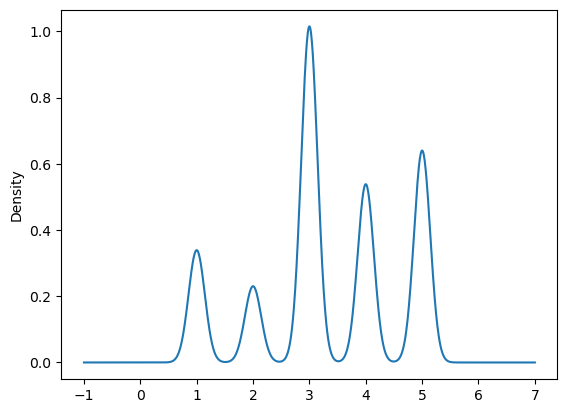

In [185]:
# Check the distribution
data['previous_year_rating'].plot(kind='kde')

<Axes: xlabel='education', ylabel='Count'>

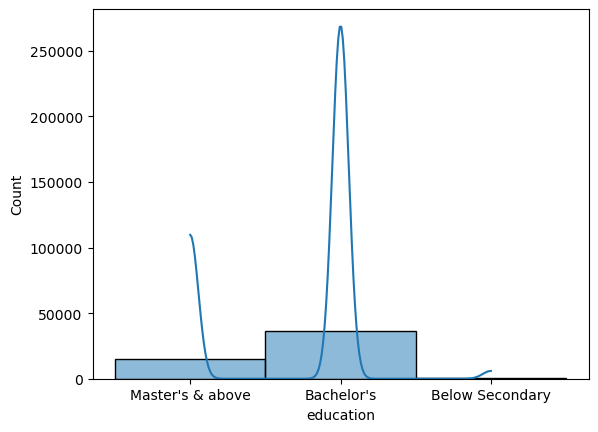

In [187]:
sns.histplot(data['education'],kde=True)

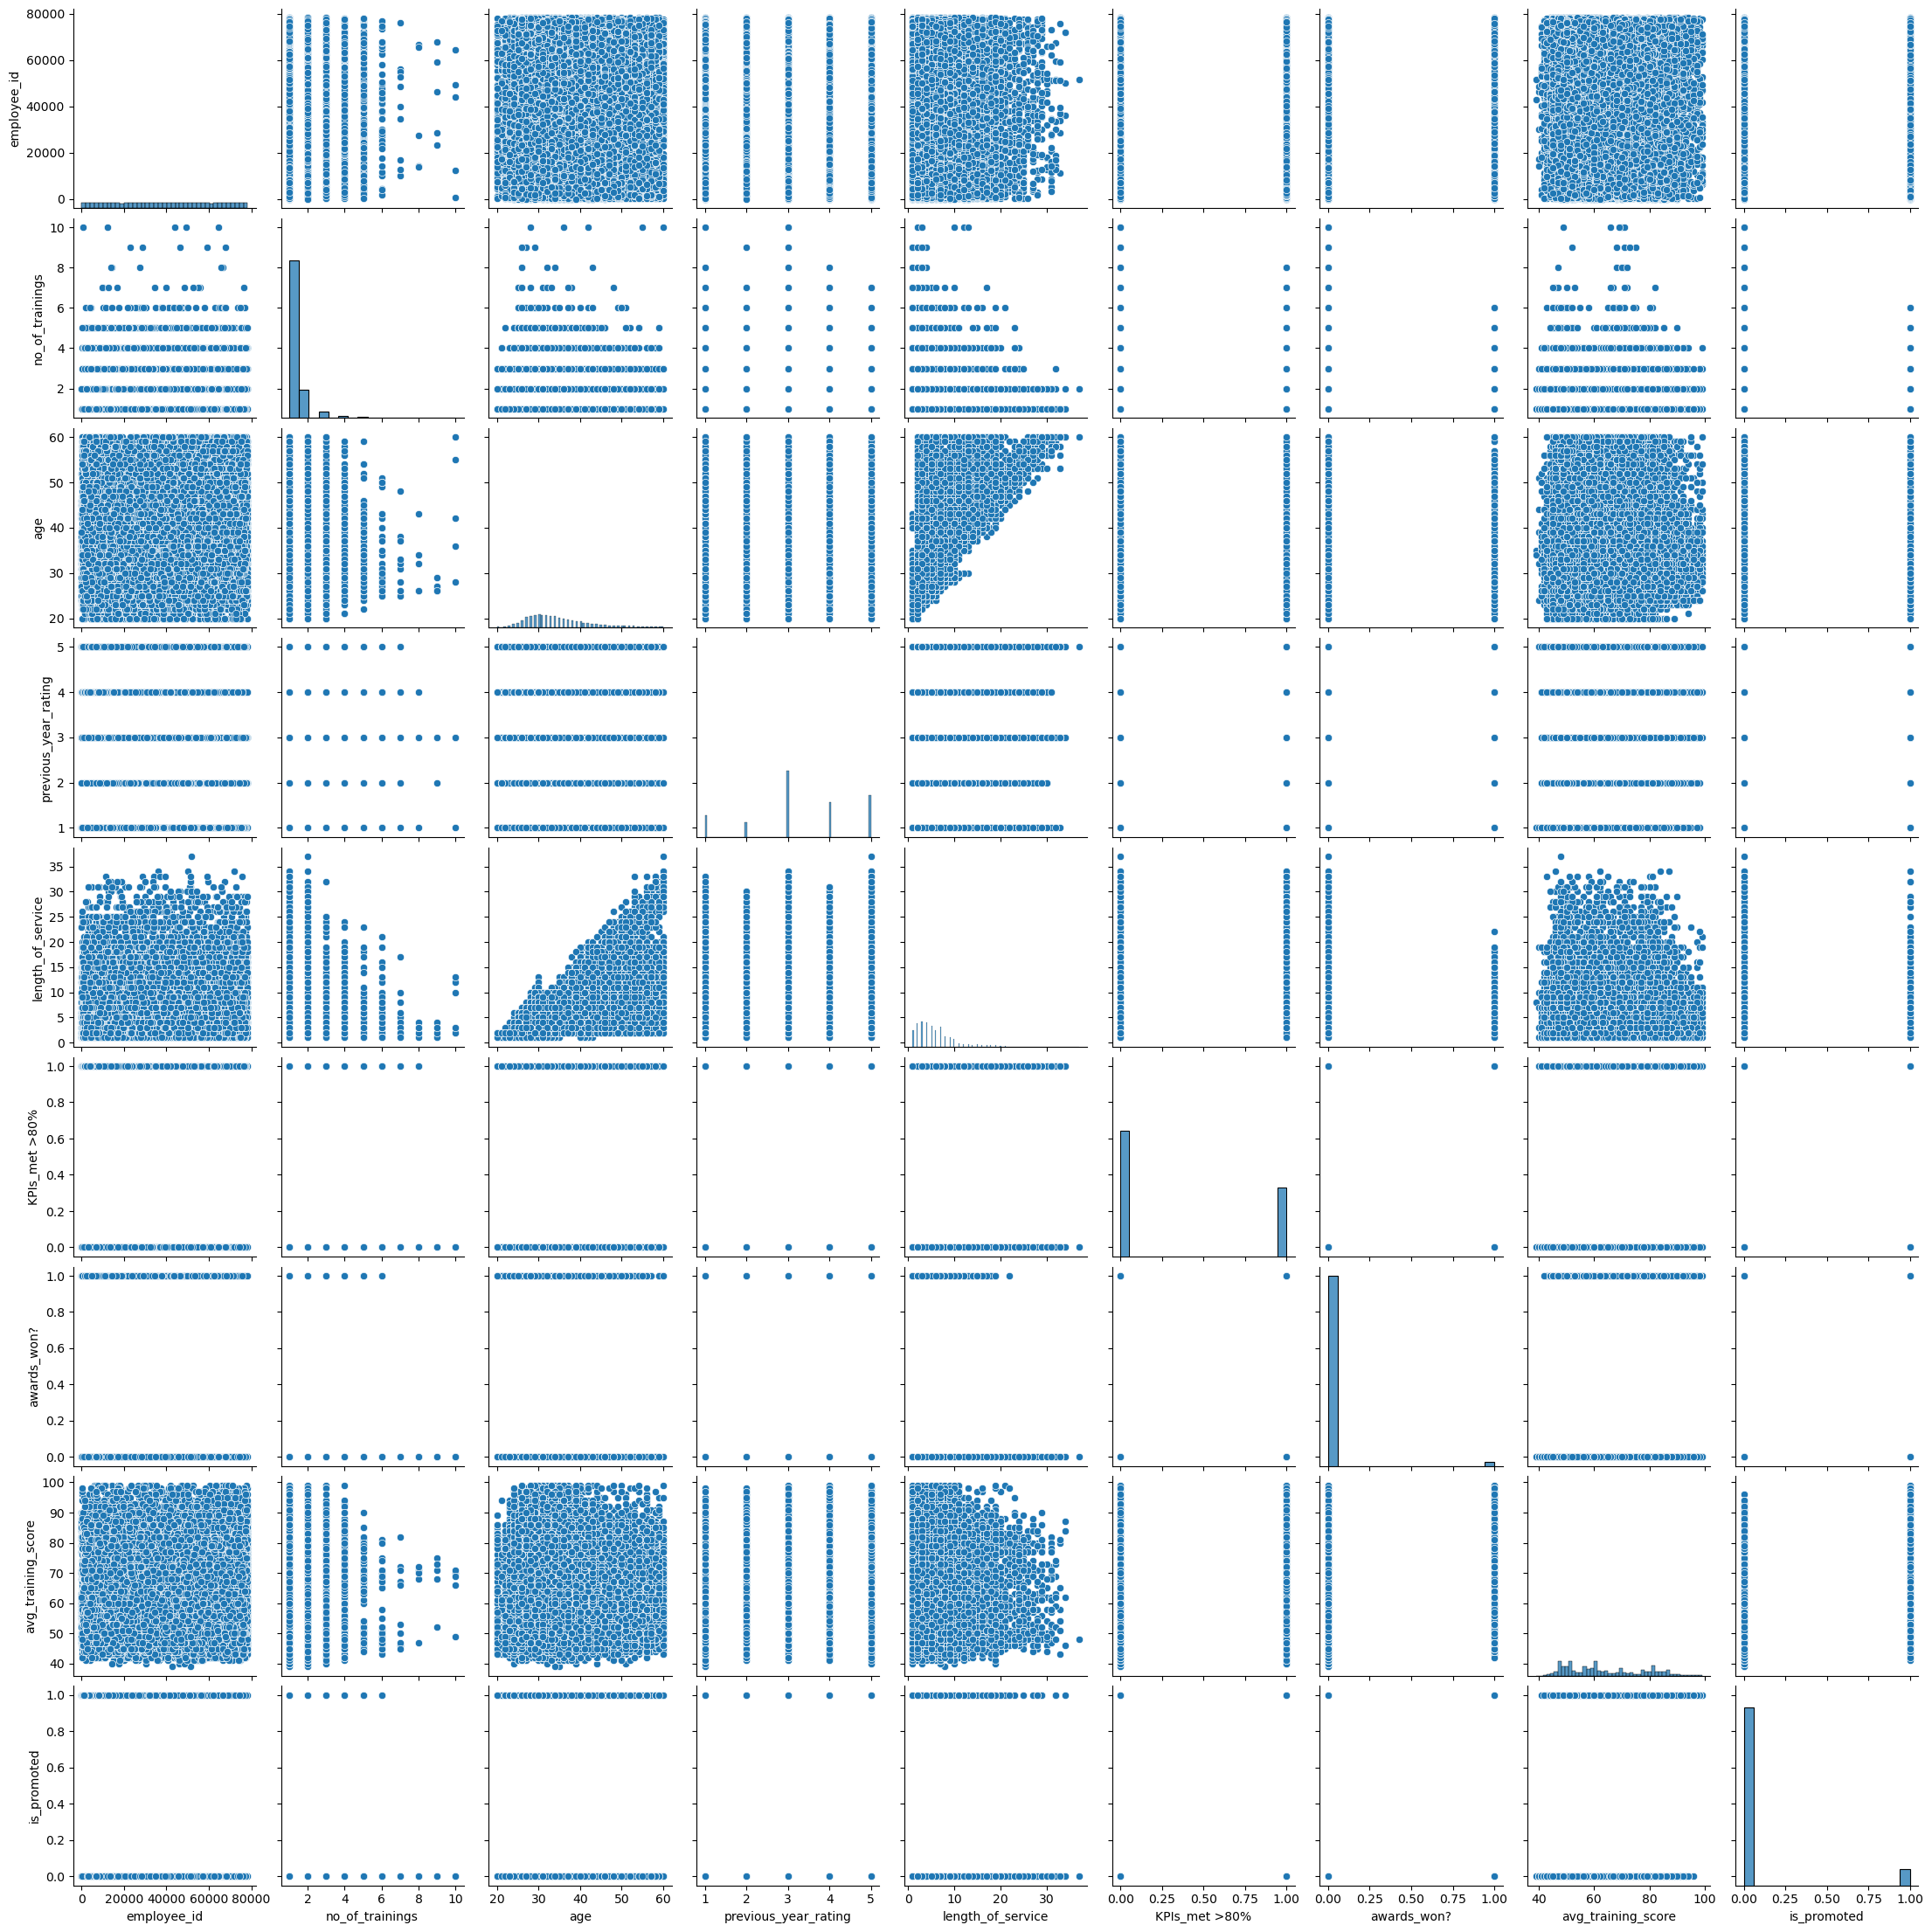

In [189]:
sns.pairplot(data)


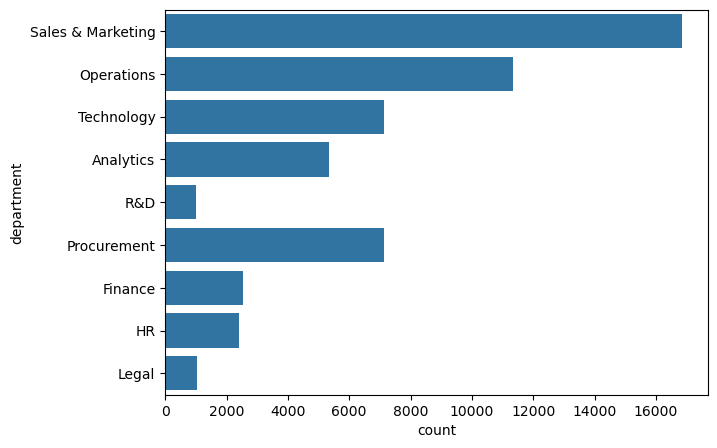

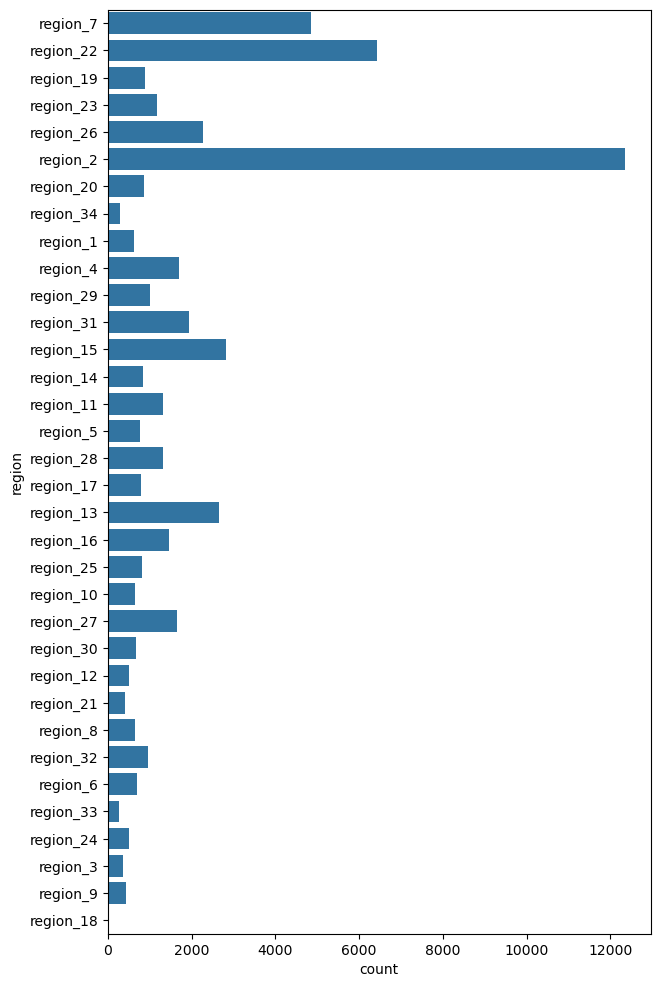

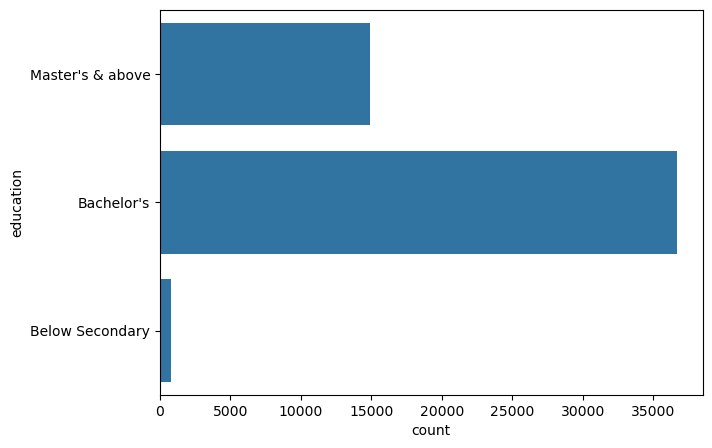

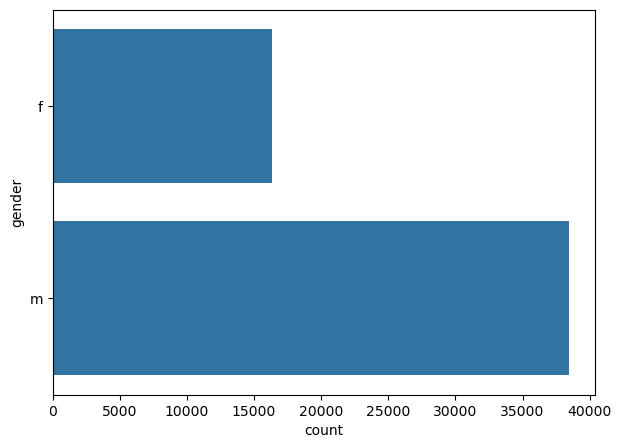

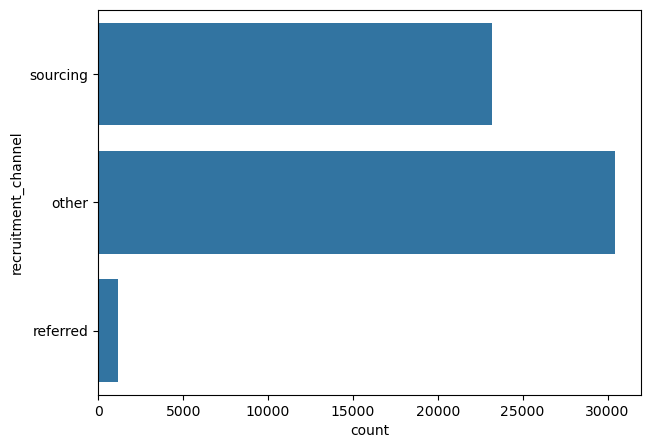

In [225]:
for col in data.select_dtypes(include='object').columns:
    if col == 'region':
        plt.figure(figsize=(7,12))
    else:
        plt.figure(figsize=(7,5))
    sns.countplot(y=data[col])
    plt.show()

In [229]:

data['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

<Axes: ylabel='Density'>

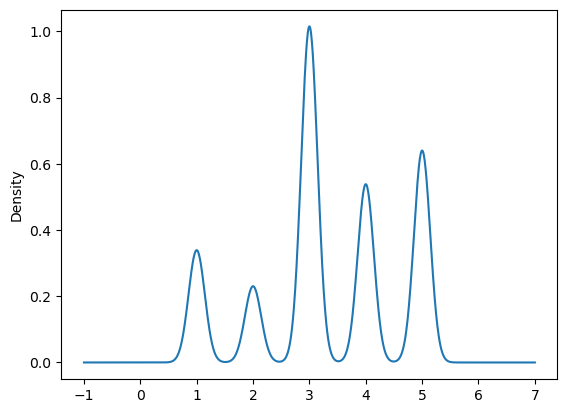

In [239]:
data['previous_year_rating'].plot(kind='kde')

In [233]:
#KNN

In [257]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [291]:
ignore_col=['employee_id','education','is_promoted']
target_col=['previous_year_rating']
num_col=[]
cat_col=[]
for col in data.columns:
    if col not in ignore_col + target_col:
        if data[col].dtypes == 'object':
            cat_col.append(col)
        else:
            num_col.append(col)

In [293]:
#categorical and numerical columns imputed and encoded
#categorical columns imputed by mode and encoded by onehotencoder
#numerical columns imputed by median and encoded by standardscalar
cat_pipe_encode=Pipeline(
    steps=[
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])
num_pip_encode=Pipeline(
    steps=[
    ('standardscalar',StandardScaler())
])
## map tranformation to features
preprocess=ColumnTransformer(
    transformers=[
        ('cat_encode',cat_pipe_encode,cat_col),
        ('num_encode',num_pip_encode,num_col)
    ]
)

In [295]:
data_notnull=data[data['previous_year_rating'].notnull()]
data_null = data[data['previous_year_rating'].isna()]

X=data_notnull.drop(columns=['previous_year_rating','education','is_promoted'])
y=data_notnull['previous_year_rating']

model_pipeline = Pipeline(
    steps=[
        ('preprocess',preprocess),
        ('model',KNeighborsClassifier(n_neighbors=5))
    ]
)
model_pipeline.fit(X,y)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('standardscalar',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'awards_won?',
                                                   'avg_training_score'])])),
                ('model', KNeighborsClassifier())])

In [297]:
test=data_null.drop(columns=['previous_year_rating','education','is_promoted'])
pred = model_pipeline.predict(test)

In [301]:
data.loc[data['previous_year_rating'].isna(),'previous_year_rating'] = pred

<Axes: ylabel='Density'>

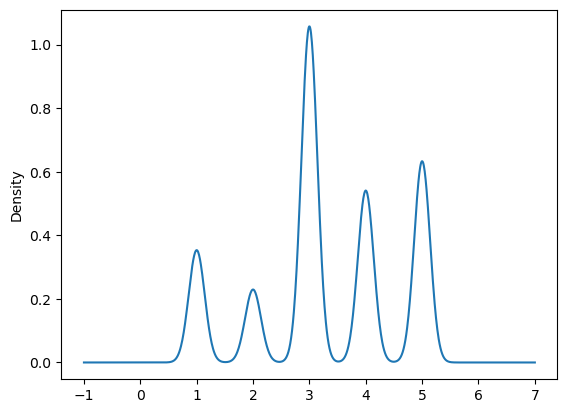

In [303]:
data['previous_year_rating'].plot(kind='kde')

In [307]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [1]:
import seaborn as sns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
data['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

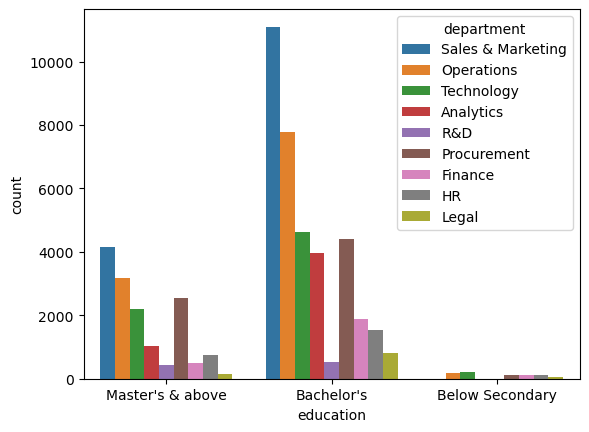

In [14]:
sns.countplot(x='education' , hue ='department' , data =data)

In [18]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [26]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(data['region'],data['education'],random_state=3)
print("mutual information",mutual_info)

TypeError: '<' not supported between instances of 'float' and 'str'

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Encode categorical columns
le_region = LabelEncoder()
le_education = LabelEncoder()

data['region_encoded'] = le_region.fit_transform(data['region'])
data['education_encoded'] = le_education.fit_transform(data['education'])

# Compute mutual information
mutual_info = mutual_info_classif(
    data[['region_encoded']], data['education_encoded'], discrete_features=True
)
print(f"Mutual Information: {mutual_info}")


Mutual Information: [0.04260495]


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Encode categorical columns
le_region = LabelEncoder()
le_education = LabelEncoder()

data['region_encoded'] = le_region.fit_transform(data['department'])
data['education_encoded'] = le_education.fit_transform(data['education'])

# Compute mutual information
mutual_info = mutual_info_classif(
    data[['region_encoded']], data['education_encoded'], discrete_features=True
)
print(f"Mutual Information: {mutual_info}")


Mutual Information: [0.0313705]


In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Encode categorical columns
le_region = LabelEncoder()
le_education = LabelEncoder()

data['region_encoded'] = le_region.fit_transform(data['recruitment_channel'])
data['education_encoded'] = le_education.fit_transform(data['education'])

# Compute mutual information
mutual_info = mutual_info_classif(
    data[['region_encoded']], data['education_encoded'], discrete_features=True
)
print(f"Mutual Information: {mutual_info}")


Mutual Information: [0.00123295]


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Encode categorical columns
le_region = LabelEncoder()
le_education = LabelEncoder()

data['region_encoded'] = le_region.fit_transform(data['gender'])
data['education_encoded'] = le_education.fit_transform(data['education'])

# Compute mutual information
mutual_info = mutual_info_classif(
    data[['region_encoded']], data['education_encoded'], discrete_features=True
)
print(f"Mutual Information: {mutual_info}")


Mutual Information: [0.00261877]


In [38]:
data['education'].mode()

0    Bachelor's
Name: education, dtype: object

TypeError: Cannot convert ["Master's & above" "Bachelor's" "Bachelor's" ... "Bachelor's" nan
 "Bachelor's"] to numeric

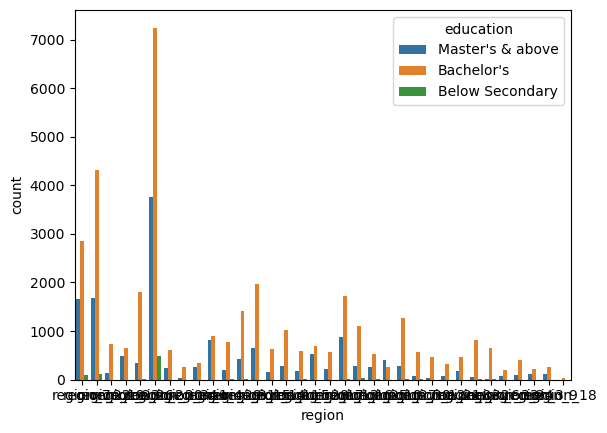

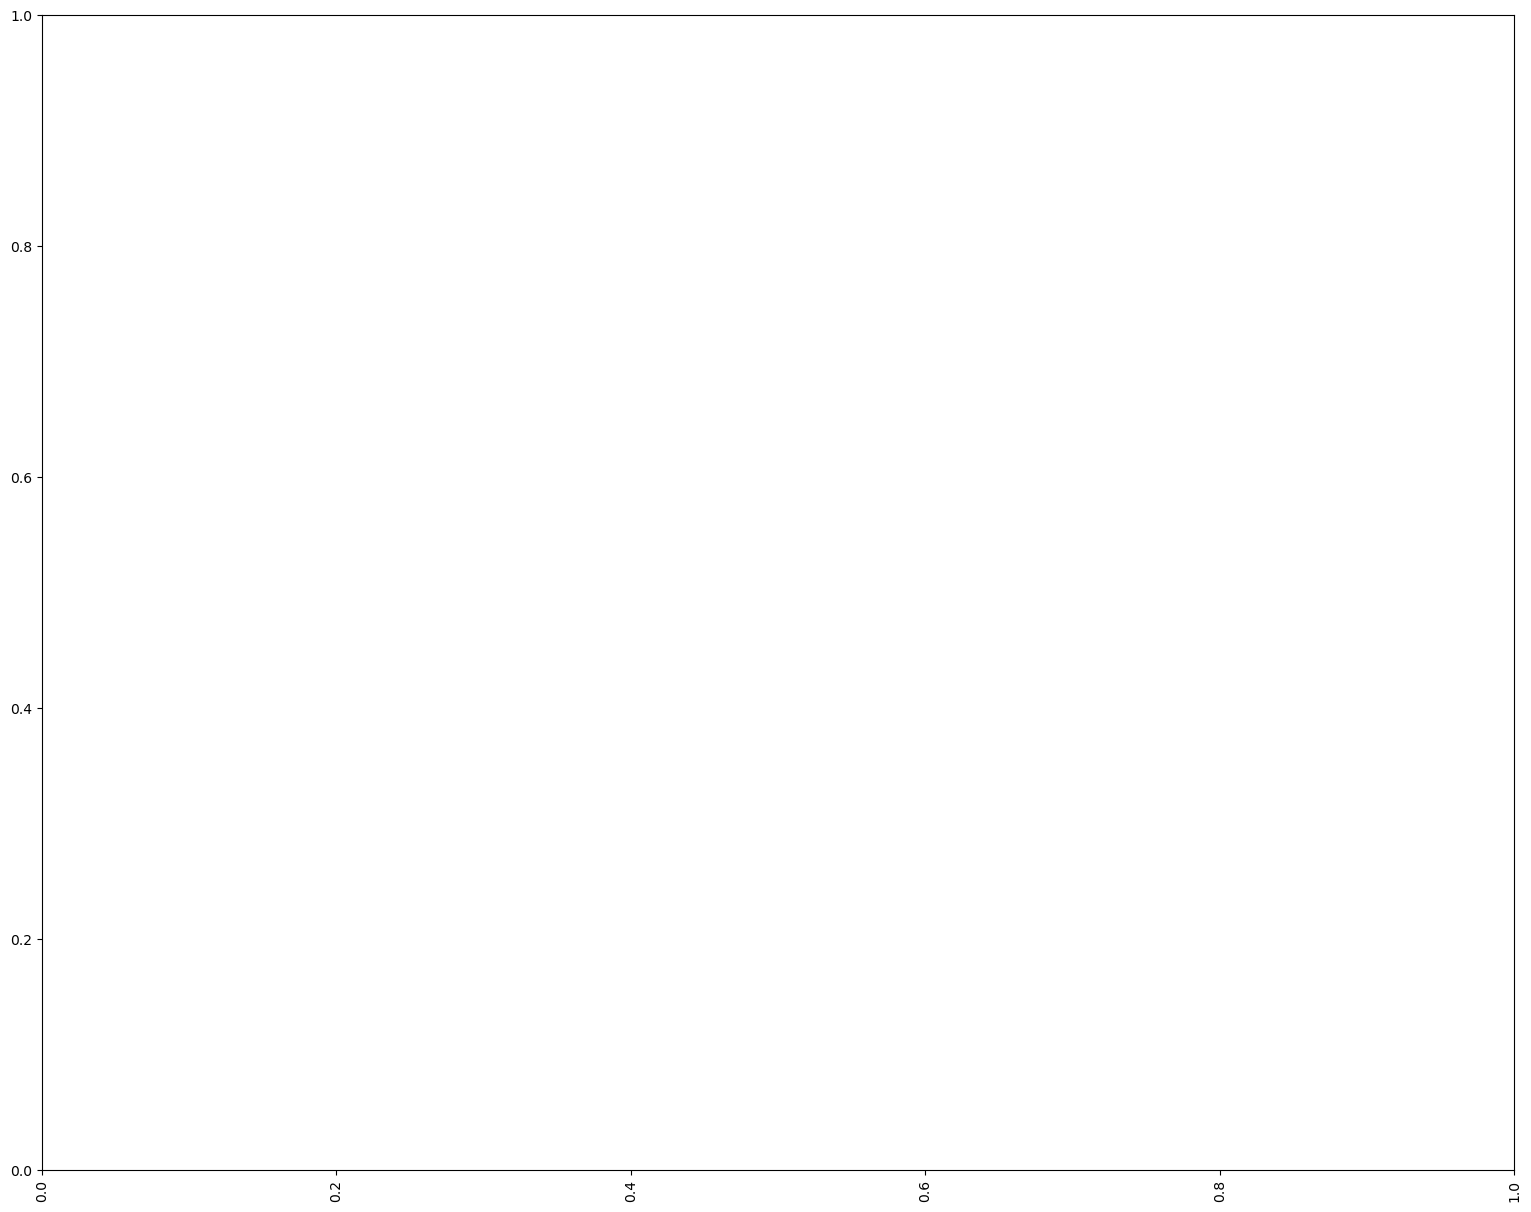

In [53]:
sns.countplot(x='region' , hue ='education' , data =data)

plt.figure(figsize=(19,15))
plt.xticks(rotation =90)
plt.show()

In [55]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'region_encoded',
       'education_encoded'],
      dtype='object')

<Axes: xlabel='education', ylabel='department'>

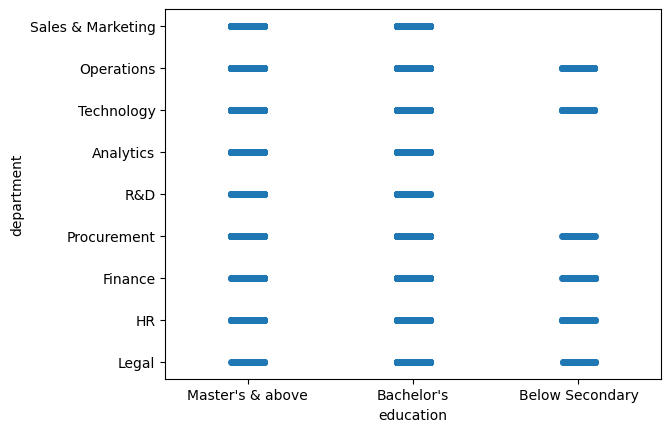

In [64]:
sns.stripplot(x='education',y='department',data=data)

In [82]:
x=data[data['education'].isna()]['department']
x

10              Technology
21              Operations
32       Sales & Marketing
43       Sales & Marketing
82       Sales & Marketing
               ...        
54692    Sales & Marketing
54717            Analytics
54729                   HR
54742    Sales & Marketing
54806    Sales & Marketing
Name: department, Length: 2409, dtype: object

<Axes: xlabel='count', ylabel='department'>

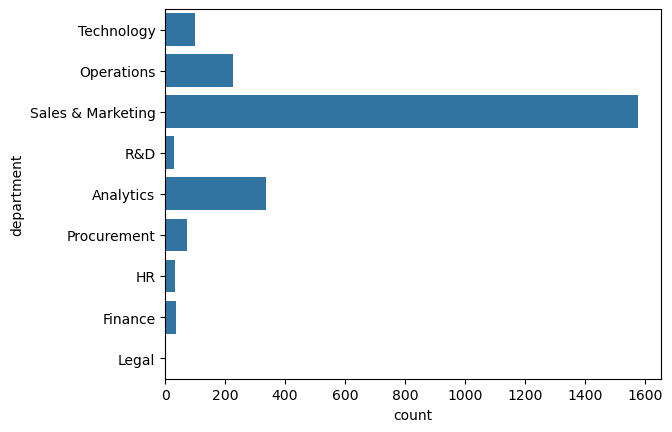

In [84]:
sns.countplot(data=x)

In [86]:
data['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [92]:
data[data['department']=='Sales & Marketing']['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [106]:
data[data['department']=='Operations']['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [94]:
data['department'].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64